In [9]:
!sudo apt update
!sudo apt install default-jre -y
!pip install autogluon language_tool_python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.multimodal import MultiModalPredictor
from language_tool_python import LanguageTool
import concurrent.futures

train_data = TabularDataset('data/train.csv')
test_data = TabularDataset('data/test.csv')

Loaded data from: data/train.csv | Columns = 3 / 3 | Rows = 17307 -> 17307
Loaded data from: data/test.csv | Columns = 2 / 2 | Rows = 3 -> 3
Loaded data from: data/test.csv | Columns = 2 / 2 | Rows = 3 -> 3


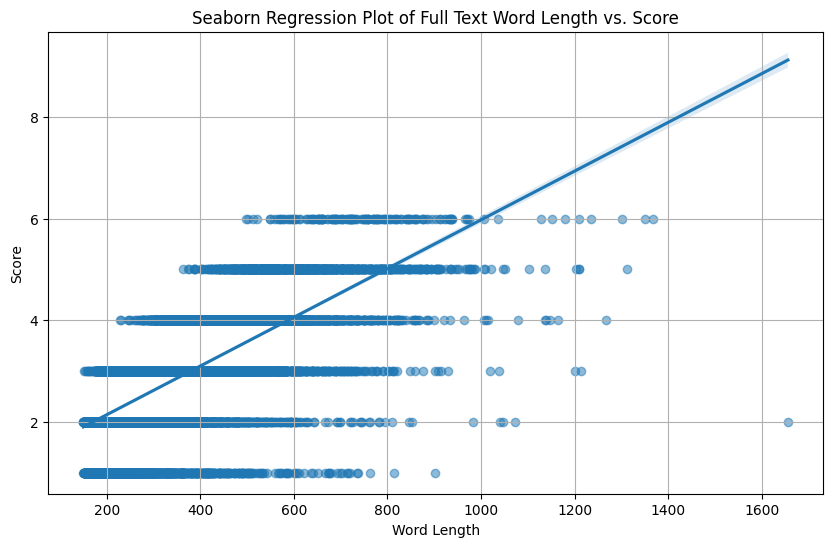

In [10]:
train_data['word_length'] = train_data['full_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.regplot(data=train_data, x='word_length', y='score', scatter_kws={'alpha':0.5})
plt.title('Seaborn Regression Plot of Full Text Word Length vs. Score')
plt.xlabel('Word Length')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [11]:
lt = LanguageTool('en-US')

def count_grammar_errors(text):
    matches = lt.check(text)
    return len(matches)

def apply_parallel(df, func):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(func, df['full_text']))
    return results

train_data['grammar_errors'] = apply_parallel(train_data, count_grammar_errors)

plt.figure(figsize=(10, 6))
sns.regplot(data=train_data, x='grammar_errors', y='score', scatter_kws={'alpha':0.5})
plt.title('Seaborn Regression Plot of Grammar Errors vs. Score')
plt.xlabel('Number of Grammar Errors')
plt.ylabel('Score')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
predictor = MultiModalPredictor(label='score', eval_metric='quadratic_kappa').fit(train_data=train_data.drop(['essay_id'], axis=1))